# Exploratory Data Analysis of Car Features

##  So what is EDA?

Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual  methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the        formal modeling or hypothesis testing task.


## Context of the Project.

As a data scientist, the majority of your time will be spent on data pre-processing i.e.
making sure you have the right data in the right format. Once this is done, you get a
sense of your dataset through applying some descriptive statistics and then, you move
on to the exploration stage wherein you plot various graphs and mine the hidden
insights. In this project, you as a data scientist are expected to perform Exploratory data
analysis on how the different features of a car and its price are related. The data comes
from the Kaggle dataset "Car Features and MSRP". It describes almost 12,000 car
models, sold in the USA between 1990 and 2017, with the market price (new or used)
and some features.


## Data Description
 Make: Car Make
 
 Model: Car Model
 
 Year: Car Year (Marketing)
 
 Engine Fuel: Type Engine Fuel Type
 
 Engine HP: Engine HorsePower (HP)
 
 Engine Cylinders: Engine Cylinders
 
 Transmission Type: Transmission Type
 
 Driven_Wheels: Driven Wheels
 
 Number of Doors: Number of Doors
 
 Market Category: Market Category
 
 Vehicle Size: Size of Vehicle
 
 Vehicle Style: Type of Vehicle
 
 highway MPG: Highway MPG
 
 city mpg: City MPG
 
 Popularity: Popularity (Twitter)
 
 MSRP: Manufacturer Suggested Retail Price


# Aim

Our dataset contain lots of feature and our job is to clean and analyse data and depict the features on which price is dependent and perform statistical analysis to find the correlation among the features and build a model accordingly which will give us the best score.


## Approch and Steps.

In this project we're gonna follow certain steps and carefully analyse the data at each and every step. I have tried to explain every step carefully and commenting the lines which are important and useful.

This project is divided into 10 major step, starting from the data preprocessing step i.e. importing libraries and importing the data set.

Second we move on to the interesting part of analysing the data in various ways, such as finding the null values in the data, dropping the columns which will not affect our model training part and handling the null value either by removing it or filling it by some relevent values.

Next, we find out the outliers in our data set and try to analyse it and remove it and renaming other columns for easy access.

Next, we plot certain graphs, comparison chart and correlation matrix to find the dependency of one independent variables with other and see how it affects our price value of our cars.

After analysing and comparing the variable we split and train our data for best fitted model and check for score and mean error.

So without wasting anytime, let us begin with this project!!

# Starting The Project

So now that you're familiar with the EDA, data set and steps, let us start this project. 

HAPPY ANALYSING!!

# Step 1

Step 1 contains the following sub-step to ease the proccess of understanding and analysing.

Importing the dataset and the necessary libraries 

checking datatype

statistical summary

shape and null values 

## Importing the neccessary library

Pandas library - Pandas is an open-source, BSD-licensed Python library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

Matplotlib.pyplot - Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt

Numpy - NumPy is a python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices. NumPy was created in 2005 by Travis Oliphant. It is an open source project and you can use it freely.

Seaborn - Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [112]:
import pandas as pd
import matplotlib.pyplot as plt  #for visualizing the data
import numpy as np               
import seaborn as sns            #for visualizing the data

## Loading the data set 

In the following sub-step we are loading the data set using pandas library in the variable dataset

In [113]:
#importing the dataset
dataset = pd.read_csv('data.csv')


## Glancing at the Data

In this step, we are taking a peak into our dataset by using the head() function. Using this function we are able to see five rows and all the column(total of 16 columns) of our data set.

In [114]:
dataset.head() #to observe first five data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Bottom Look

tail() function is similar to the head() function just that it show the dataset from the bottom. So, when working with the big data set say like the data set contain 12,000 rows, the tail() function help us to glance the data set from the bottom.

In [115]:
dataset.tail() #to observe last five data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


## Information about the Data Set

When we're dealing with such a huge data, it is impossible to collect all the information regarding our data set, so to easy this proccess comes the info() function which give us the information about all the columns, number of non-null values in it and the type of the column e.g. object type or int64 or float64 etc.

In [116]:
dataset.info() #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

## Count of NaN (Not a Number)

Null value data is not helpful for us in any way, so first we have to count the number of null values in our data set, perticularly in each column and then analyse it whether to fill the null values or just drop them.

The function isnull() give us the null values in the column and sum() function help us to sum up all the null values in each column.

So, how to decide whether we should drop the NaN values or fill it up. Well, it all depend upon our data set, if the NaN values is less comparing to our number of rows it is advisable to just drop the null values because it will not affect our model training part, but if the the data set is small say like 1000 rows, then it is advisable to fill the null value with some relevant values because loosing the data in such cases might be harmful.

We'll get back to this point in the later stage when we will deal with the null value, for now we see that the there are very little null value as compared to our dataset except for the "Market Value" column and we cannot fill such a large number of null values so we'll just drop that column.

In [117]:
dataset.isnull().sum() #number of null values in the dataset

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

## Statistical Analysis

describe() function help us to gain information about various statistical point of our dataset like cmean, standard daviation which help us in later stages perticulary when we're observing correlation matrix.

In [118]:
dataset.describe() #various statistical description related to our numeric part of our dataset

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## Some more observations

The following function give us the unique, top and the frequency of the top value in each column of our dataset

In [119]:
dataset.describe(include = ['O'])

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,915,10,5,4,71,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


## Shape

This function give us the size of the dataset. In our dataset there are 11914 rows (including all the null values and duplicate values) and 16 columns.

This also marks the end of our first step. Now from the next step we'll start to make some changes in our dataset. 

In [120]:
dataset.shape #gives the shape of the dataset

(11914, 16)

# Step 2 (Dropping the columns)

This is a small step in which we'll remove the column which are of no use to us and will not help to train our model properly.

In this step we're removing three columns namely, "Engine Fuel Type", "Number of Doors" and "Market Category". The first two removed column will not affect much in the price of the cars when comapred with other variables and the last one that is "Market Category" contains lot of null value, 3742 to be precise and it make no sense to fill the null values (as explained above in the sub-step of counting null values), so we just drop these columns.

drop() function help us to achieve our desired goal.

In [121]:
dataset = dataset.drop(['Engine Fuel Type', 'Number of Doors', 'Market Category'], axis = 1) #dropping some of the columns

## Observing

Just to make sure that the columns we dropped are actually removed from our dataset we use the head() function again.

In [122]:
dataset.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# Step 3 (Renaming the Columns)

Sometimes the names of the column given are not generally used in common, so to make our column names (car features) make much sense we change it's name to our convenience.

In [123]:
#renaming the columns name
dataset = dataset.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})

## Observing

Just to make sure our column names have been changed we use head() function.

In [124]:
dataset.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# Step 4 (Handling the NaN and Duplicate Values)

Now here comes the interesting part, since the null values are of no use to us because there are approx. 100 null values in our dataset, but our dataset contains more than 11,000 data, so by dropping these null values will hardly cause any change in our model training part.

Second thing is that, there are numerous duplicate data because many of the buyers had bought same model car over the years and duplicate data might cause some errors in later stage or will just make our part of data useless. So, to avoid this, we will remove the duplicate values too.

Therefore, STEP 4 is divided in 2 sub-steps:

1) Removing duplicate data

2) Dropping null value data


## Removing Duplicate Data

To fullfil our desired goal, we use drop_duplicates() function. It removes all the duplicate data in our data set, but we want to have atleast one set of data from the duplicate values otherwise there will be lose of data, to prevent this we set the arguement keep as 'first'.

In [125]:
dataset.drop_duplicates(subset=None, keep='first', inplace=True) #removing duplicate values and keeping only one.

## Confirming Shape

To confirm that our duplicate values have been removed we use the shape function again.

We observe that the number of rows in our dataset is reduced from 11914 to 11122 i.e. there were 792 duplicate data. We also notice that the number of column is reduced from 16 to 13 from our previous code of dropping the irrelevant column.

In [126]:
dataset.shape #checking the shape

(11122, 13)

## Dropping Null Value Data

Now we shall remove the null values from our data set because removing them will hardly affect our dataset.

We can always fill the null value too but in this case i opted to just drop them, if you want to you can fill them too using fillna() function.

## Number of Null Values

This step give us the sum of total number of null values.

In [127]:
dataset.isnull().sum()

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64

## Dropping 

To drop the null value from our dataset we use dropna() function. It removes all the null values from all the columns of our dataset.

In [128]:
dataset = dataset.dropna() #to drop all the null values

## Checking

Just to be sure that our null values have been removed perfectly, we once again check for the sum of null values in our dataset and we can clearly see that there are zero null values in every column.

In [129]:
dataset.isnull().sum()

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64

## Checking

We can see that our shape has also been reduced by 99.

In [130]:
dataset.shape

(11024, 13)

# Step 5 (Checking and Removing Outliers)

## What does outliers means?

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.
It can also be defined as  outliers are that  points which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile. 

## Should outliers be removed?

Removing outliers is legitimate only for specific reasons. Outliers can be very informative about the subject-area and data collection process. Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant.

## Ways of removing outliers?

There are generally three methods to remove outliers from the dataset.

1) Univariate Method - One of the simplest methods for detecting outliers is the use of box plots. A box plot is a graphical display for describing the distributions of the data. Box plots use the median and the lower and upper quartiles.

2) Multivariate Method - Outliers do not need to be extreme values. Therefore, the univariate method does not always work well. The multivariate method tries to solve that by building a predictive model using all the data available and cleaning those instances with errors above a given value.

3) Minkowski error - Now, we talk about a different method for dealing with outliers. Unlike the univariate and multivariate methods, it doesn't detect and clean the outliers. Instead, it reduces the impact that outliers will have on the model. The Minkowski error is a loss index that is more insensitive to outliers than the standard mean squared error.The Minkowski error solves that by raising each instance error to a number smaller than 2. This number is called the Minkowski parameter, and reduces the contribution of outliers to the total error.

So now that we know about the outliers and ways of removing it, we will detect the outliers in our dataset by plotting various boxplot and then try to remove them by using univariate method i.e. interquartile method.



## Outliers in HP

We observe that many data point in HP column lies beyond the boxplot, thus there are lot of outliers in the HP and we should remove them.

boxplot() function of the seaborn library help us to plot the boxplot of any dataset.

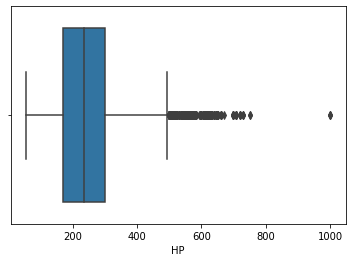

In [131]:
sns.boxplot(x = dataset['HP']) #boxplot of HP

## Outliers in Cylinders

We observe that the number of outliers in cylinder column is way less than the outliers present in the HP column. But still they exist and ought to be removed.

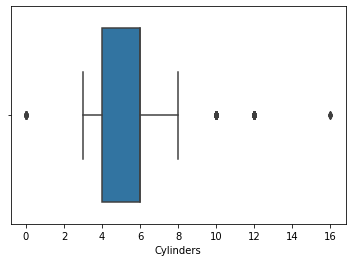

In [132]:
sns.boxplot(x = dataset['Cylinders']) #boxplot of Cylinders

## Outliers in Price 

We observe that there is not very well defined boxplot of price column, outliers still exists and we'll deal with them too.

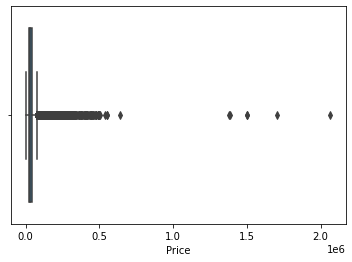

In [133]:
sns.boxplot(x = dataset['Price']) #boxplot of Price

## Outliers in MPG-H

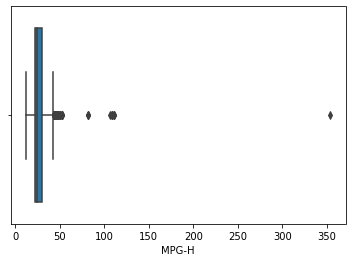

In [134]:
sns.boxplot(x = dataset['MPG-H']) #boxplot of MPG-H

## Outliers in MPG-C 

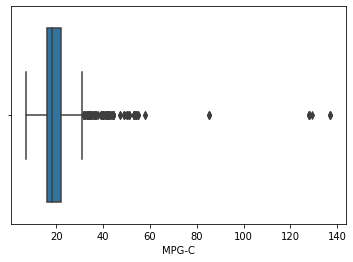

In [135]:
sns.boxplot(x = dataset['MPG-C']) #boxplot of MPG-c

## Outliers in Popularity

Only one or two outliers present in the popularity column

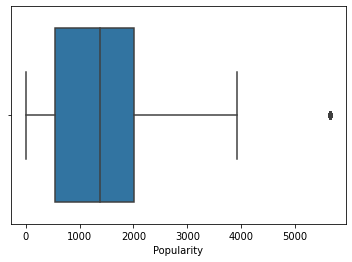

In [136]:
sns.boxplot(x = dataset['Popularity']) #boxplot of popularity

## Univariate Method

In the below code we calculate the Interquartile Range of our dataset using quantitle() function

In [137]:
Q1 = dataset.quantile(0.25) #calculating Q1
Q3 = dataset.quantile(0.75) #calculating Q2
IQR = Q3 - Q1               #Storing IQR
IQR

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64

## Formula

Below we use the formula to remove all the outliers present in our dataset and then displaying the shape of our dataset to see the numbers of ouliers removed. Before the removal of outliers there were 11122 data and now there are 8546 data, so the total of 2,576 outliers have been removed from our dataset.

In [138]:
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)] #removing outliers from the dataset
dataset.shape

(8546, 13)

# Step 6 (Comparing Car Brand with Price and Predicting Top 10 Brands)

In step 6, our main motive is to compare car brands with the price of the car and glacing at the top 11 car brands name along with there mean price.

## Comparing with all

In this step we use the groupby() function to display the car brand along with their price (mean price to be precise which is calculated using mean() function)

In [139]:
dataset[['Make', 'Price']].groupby(['Make'], as_index = False).mean() #comapring car brands with their mean price

,Make,Price
0,Acura,34663.448276
1,Alfa Romeo,61600.000000
2,Audi,45654.183333
3,BMW,48111.880734
4,Buick,29915.739130
5,Cadillac,49831.070000
6,Chevrolet,28142.855891
7,Chrysler,28723.664740
8,Dodge,26076.722353
9,FIAT,22206.016949


## Visualizing using Bar Graph

Now we will see which car brand was bought most by the buyers using bar graph.

Now to properly visualize this, we plot a bar graph with car brands on y-axis and there count on the x-axis.

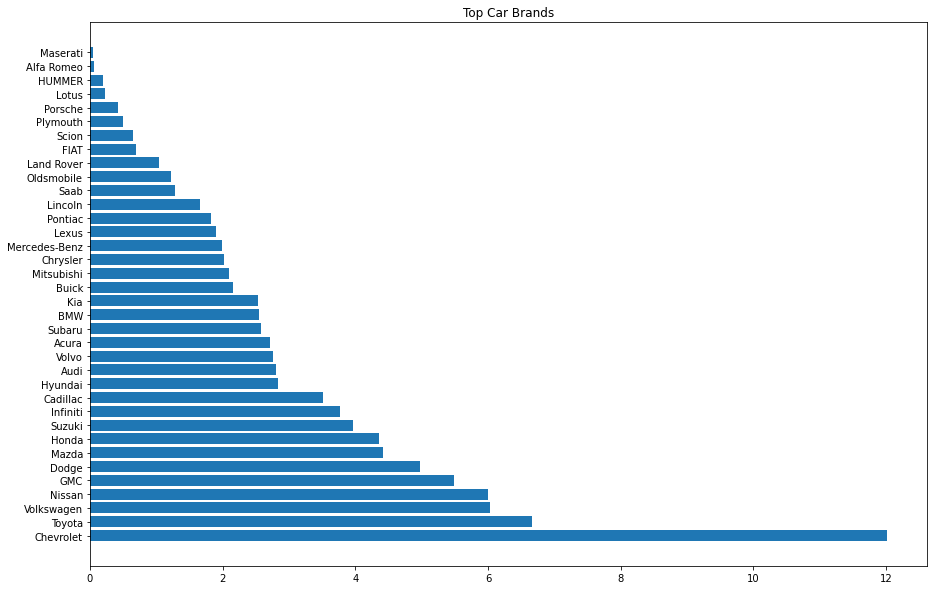

In [140]:
count = dataset['Make'].value_counts()*100/sum(dataset['Make'].value_counts()) #counting the number of cars of a particular brand
popularity = count.index[:36]
plt.figure(figsize=(15,10))
plt.barh(popularity,width=count[:36]) #ploting the bar graph 
plt.title("Top Car Brands")
plt.show()

## Analysing Top 11

Now that we know which car brand was sold the most, we pick the top 11 car brands and comparing it with their mean price to see how the prices changes when compared to the car brands.

And to our surprise, car brand name Cadillac had highest mean price though it was on position 11 on the car count.
Following Cadillac we have Chevrolet which has the maximum car count and with the mean price of 28142.855.

In [141]:
dataset[['Make','Price']].loc[(dataset['Make'] == 'Chevrolet')| #Grouping top 11 car brands with their mean price
               (dataset['Make'] == 'Volkswagen')|
               (dataset['Make'] == 'Toyota')|
               (dataset['Make'] == 'Dodge')|
               (dataset['Make'] == 'Nissan')|
               (dataset['Make'] == 'GMC')|
               (dataset['Make'] == 'Honda')|
               (dataset['Make'] == 'Mazda')|
               (dataset['Make'] == 'Suzuki')|
               (dataset['Make'] == 'Infiniti')|
               (dataset['Make'] == 'Cadillac')].groupby(['Make'],as_index = False).mean()

,Make,Price
0,Cadillac,49831.070000
1,Chevrolet,28142.855891
2,Dodge,26076.722353
3,GMC,33261.400853
4,Honda,27381.364611
5,Infiniti,43127.822981
6,Mazda,20495.820106
7,Nissan,28352.543860
8,Suzuki,18168.241888
9,Toyota,27769.421793


# Step 7 (Correlation Matrix)

## What is a correlation matrix?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

## How to interpret a correlation matrix?

In statistics, the correlation coefficient r measures the strength and direction of a linear relationship between two variables on a scatterplot. The value of r is always between +1 and –1. To interpret its value, see which of the following values your correlation r is closest to:


Exactly –1. A perfect downhill (negative) linear relationship

–0.70. A strong downhill (negative) linear relationship

–0.50. A moderate downhill (negative) relationship

–0.30. A weak downhill (negative) linear relationship

0. No linear relationship

+0.30. A weak uphill (positive) linear relationship

+0.50. A moderate uphill (positive) relationship

+0.70. A strong uphill (positive) linear relationship

Exactly +1. A perfect uphill (positive) linear relationship


Now that we're aware of the correlation matrix and how to interpret it, we create a correlation matrix of our data set using corr() function which give us the correlation matrix of all our numerical variable and then create a heat map to visualize it properly and draw some conclusion from it.

In [142]:
CorrMat = dataset.corr() #creating correlation matrix and storing it to CorrMat variable
CorrMat                  #displaying CorrMat

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


## Heat Map

Using heatmap() function of seaborn library we create a heat map of our correlation matrix. So let us analyse it.

From the heat map we that:

1) We see that price has a positive correlation with HP and Cylinder which means that, if we increase the HP and Cylinders the price value will increase with it too.

2) We see that the price has a negative correlation with MPG-H and MPG-C which means that, price value will decrease with the decrease of MPG-H and MPG-C value.

3) We see a high negative correlation between cylinders and MPG-H and MPG-C which make sense too because lower the mpg figure high the fuel consumption. 

4) We also see a higher positive correlation between price and year which also make sense because over the years value of the cars have increased drastically.

5) Popularity has a little positive correlation with almost every variable.

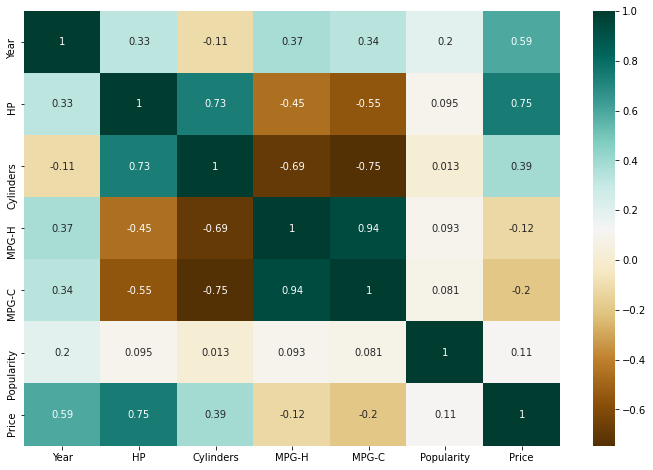

In [143]:
plt.figure(figsize=(12,8))
sns.heatmap(CorrMat,annot=True,cmap="BrBG") #plotting the heatmap of correlation matrix

# Step 8 (EDA and Plotting Various Graphs)

This is one of the major step of our project. In this step we're gonna plot various graphs showing their relationship with price and also with each other and drawing conclusion from it.

## Price vs Year

Below bar graph shows the relationship between price of cars with the years and it is clearly visible that the price of all the brands of cars increased every year but the major jump in the price can be seen in the year 20001 and from then it's been constantly increasing.

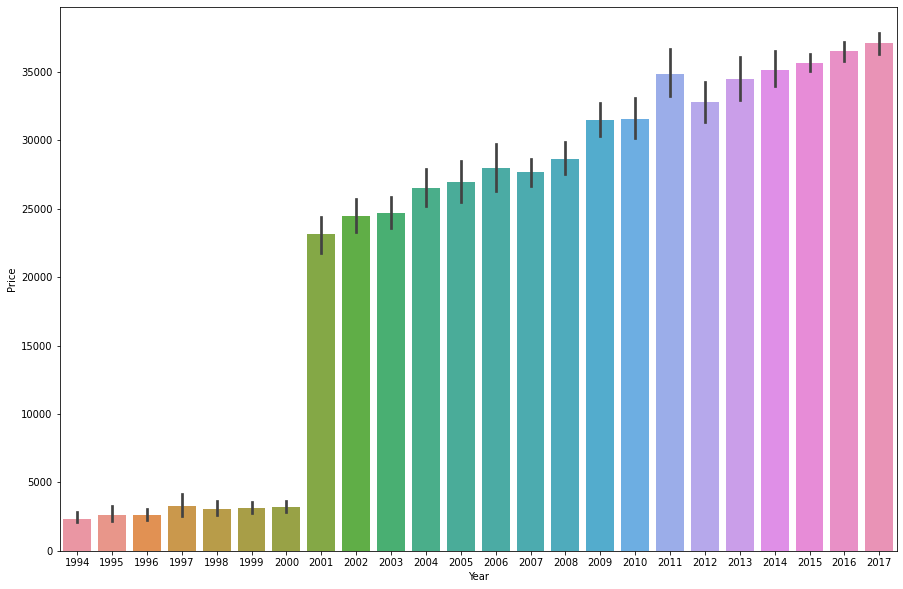

In [144]:
plt.figure(figsize=(15,10))
sns.barplot(dataset['Year'],dataset['Price']) #ploting bar graph of price vs year

## Cylinders vs Price

From the graph below we can see that with increase of the number of cylinders in the car, it's price is also increasing, thus the prediction of the correlation matrix was perfectly true.

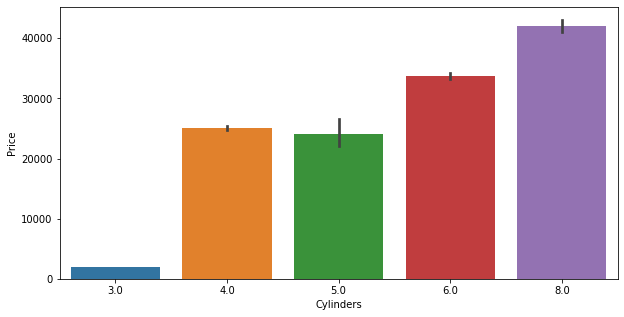

In [145]:
plt.figure(figsize=(10,5))
sns.barplot(dataset['Cylinders'],dataset['Price']) #bar graph for cylinders vs price

## MPG-H vs Price

We cannot predict much from the graph below, there is no particular trend in the bar graph but we have seen from the correlation matrix that the price has a negative correlation with the mpg, so we're gonna stick with it. 

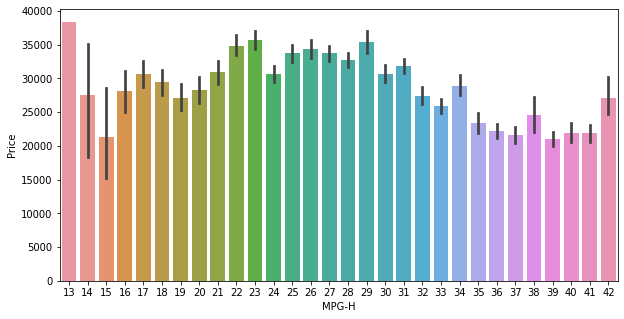

In [146]:
plt.figure(figsize=(10,5))
sns.barplot(dataset['MPG-H'],dataset['Price'])

## MPG-C vs Price

We cannot predict much from the graph below, there is no particular trend in the bar graph but we have seen from the correlation matrix that the price has a negative correlation with the mpg, so we're gonna stick with it.

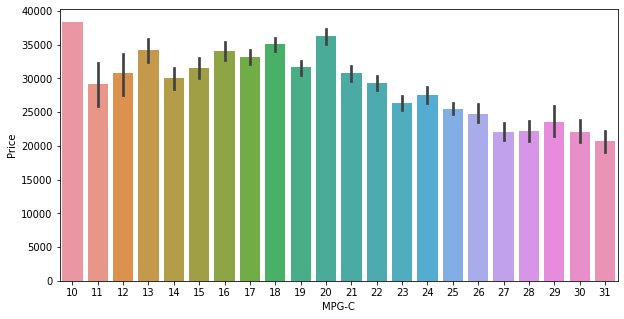

In [147]:
plt.figure(figsize=(10,5))
sns.barplot(dataset['MPG-C'],dataset['Price'])

## Scatter Plot

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X and Y axes.

## Scatter Plot b/w HP and Price

From the graph below we see a linear relationship between price and HP, as predicted by the correlation matrix.

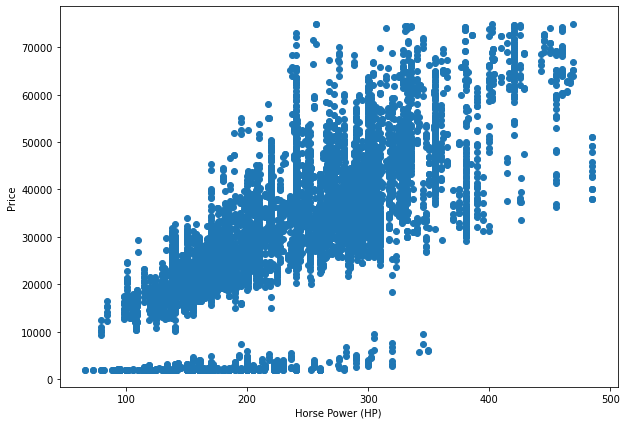

In [148]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(dataset['HP'], dataset['Price']) #plotting scatter plot b/w price and horse power
ax.set_xlabel('Horse Power (HP)')
ax.set_ylabel('Price')
plt.show()

## Scatter Plot b/w Popularity and Price

From the graph we can see that the popularity is mainly from 0 - 500

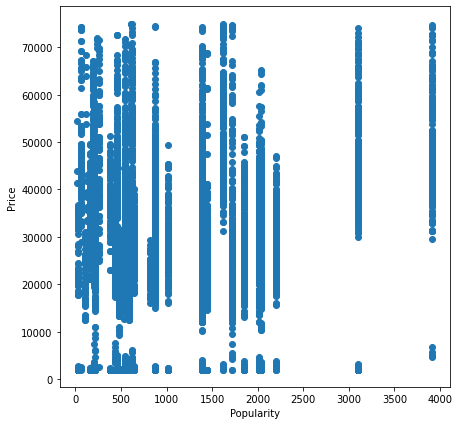

In [149]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(dataset['Popularity'], dataset['Price']) #plotting graph between popularity and price
ax.set_xlabel('Popularity')
ax.set_ylabel('Price')
plt.show()

## Scatter Plot b/w Cylinders and Price

Most of the buyers bought the cars with cylinders 4 and 6

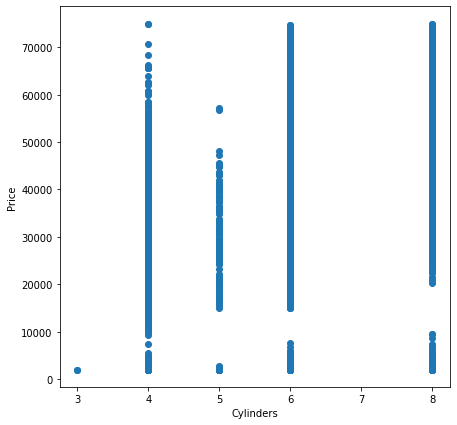

In [150]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(dataset['Cylinders'], dataset['Price'])
ax.set_xlabel('Cylinders')
ax.set_ylabel('Price')
plt.show()

## Histograms

A graphical display of data using bars of different heights. It is similar to a Bar Chart, but a histogram groups numbers into ranges. The height of each bar shows how many fall into each range.

## Histogram of Price

From this graph we see that most of the buyers bought the cars of price range 20000 - 40000

Text(0.5, 1.0, 'Frequency of Price')

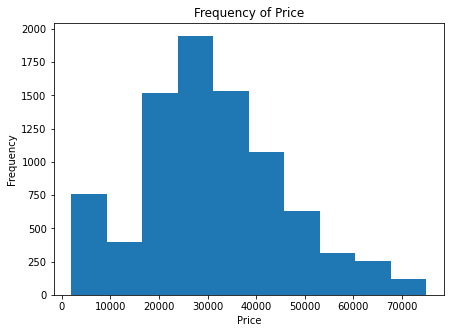

In [151]:
plt.figure(figsize=(7,5))
dataset['Price'].plot.hist()
plt.xlabel('Price')
plt.title('Frequency of Price')

## Histogram of Years

From the graph we can see that most of the cars were bought after the year 2010.

Text(0.5, 1.0, 'Frequency of Year')

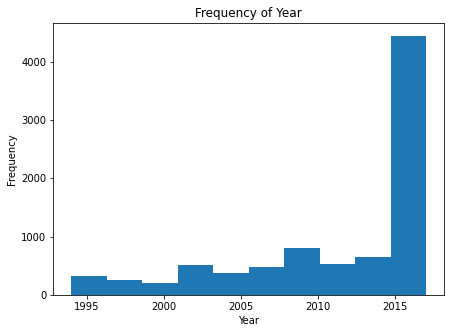

In [152]:
plt.figure(figsize=(7,5))
dataset['Year'].plot.hist()
plt.xlabel('Year')
plt.title('Frequency of Year')

## Histogram of Popularity

From the graph we can see that most of the populariy lies between 0 - 500

Text(0.5, 1.0, 'Frequency of Popularity')

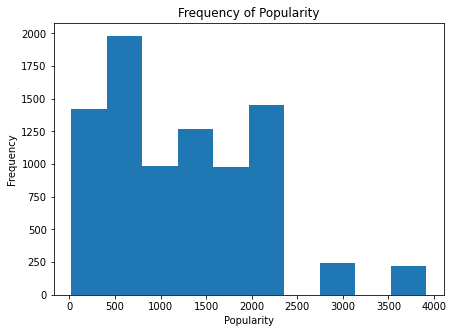

In [153]:
plt.figure(figsize=(7,5))
dataset['Popularity'].plot.hist()
plt.xlabel('Popularity')
plt.title('Frequency of Popularity')

## Countplot

A countplot is kind of like a histogram or a bar graph for some categorical area. It simply shows the number of occurrences of an item based on a certain type of category.

## Countplot b/w Vehicle Style and Drive Mode

From the countplot we can see that most of the cars that were bought was front wheel drive sedan and all wheel drive 4dr SUV

Text(0.5, 1.0, 'Comparison b/w Vehicle Type and Drive Mode')

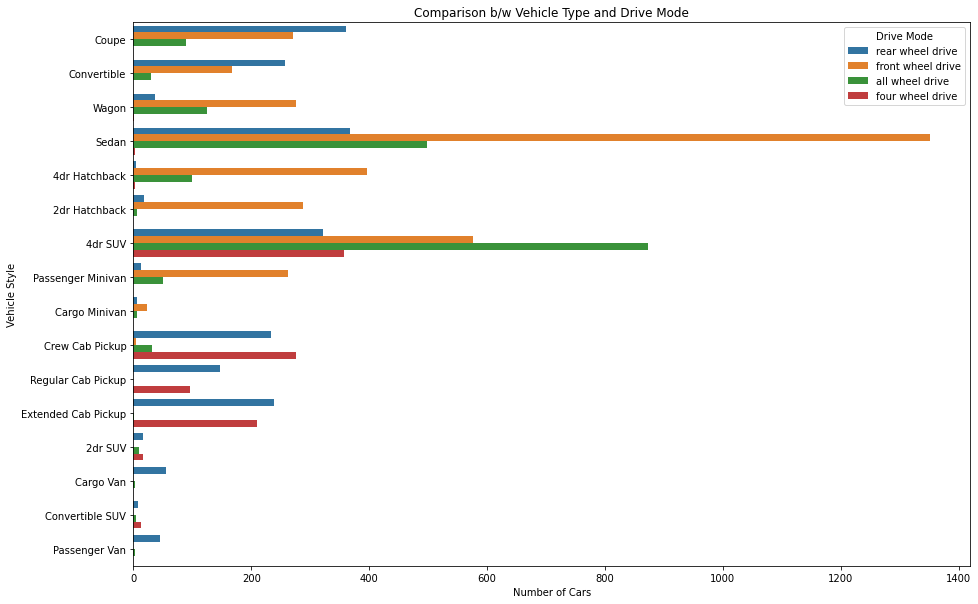

In [154]:
plt.figure(figsize=(15,10))
sns.countplot(y='Vehicle Style', data=dataset,hue='Drive Mode') #countplot of vehicle style and drive mode
plt.xlabel('Number of Cars')
plt.ylabel('Vehicle Style')
plt.title('Comparison b/w Vehicle Type and Drive Mode')

## Vehicle Style that were bought

Most of the vehicle that were bought was the sedan and the 4rd SUV

Text(0.5, 1.0, 'Number of Car Sold')

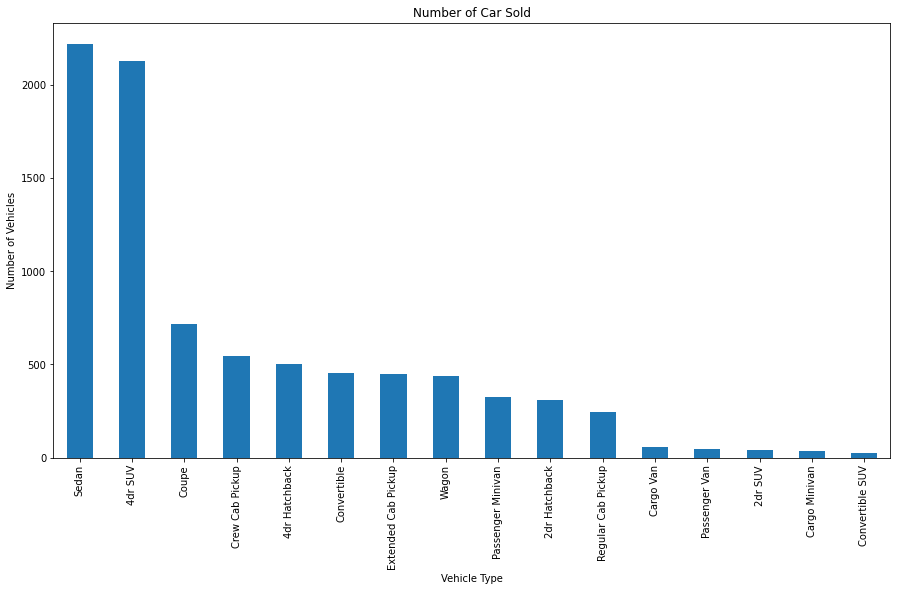

In [155]:
dataset['Vehicle Style'].value_counts().plot.bar(figsize=(15,8))
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.title('Number of Car Sold')

## Barplot b/w Transmission and Price

Automatic and automated manual cars were the highest among all the transmission

Text(0.5, 1.0, 'Comparison b\\w Transsmission and Price')

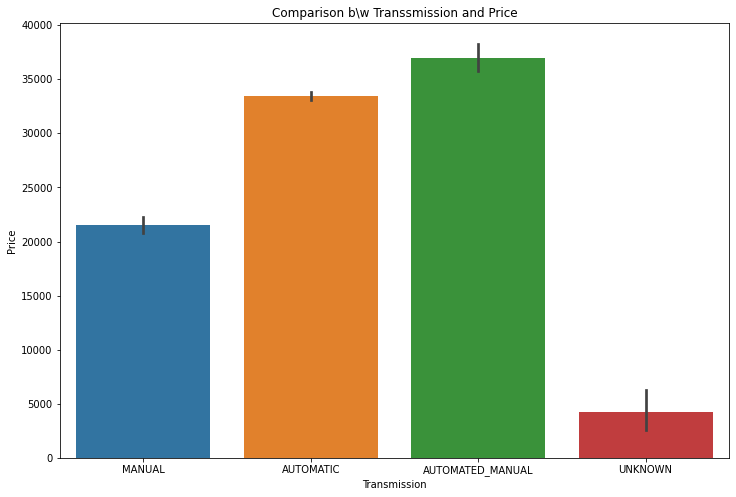

In [156]:
plt.figure(figsize=(12,8))
sns.barplot(dataset['Transmission'],dataset['Price'])
plt.title('Comparison b\w Transsmission and Price')

## Barplot b/w Vehicle size and Price

Large and medium size vehicle were quite expensive

Text(0.5, 1.0, 'Comparison b\\w Vehicle Size and Price')

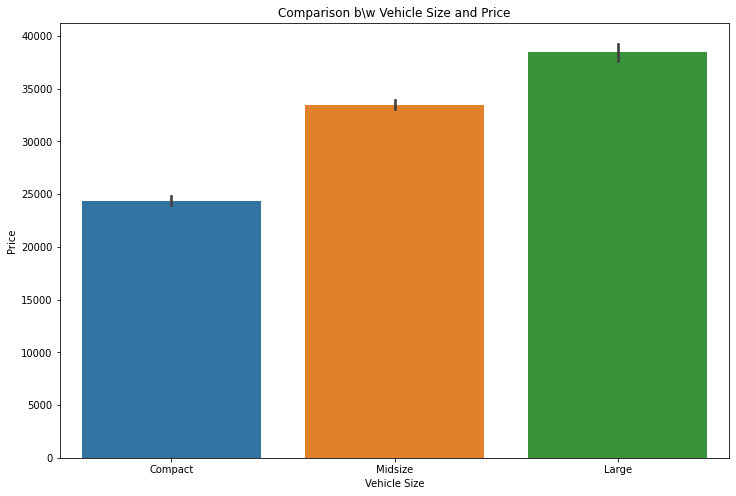

In [157]:
plt.figure(figsize=(12,8))
sns.barplot(dataset['Vehicle Size'],dataset['Price'])
plt.title('Comparison b\w Vehicle Size and Price')

## Barplot b/w Drive mode and Price

Except front wheel drive all other drive mode were expensive

Text(0.5, 1.0, 'Comparison b\\w Drive Mode Size and Price')

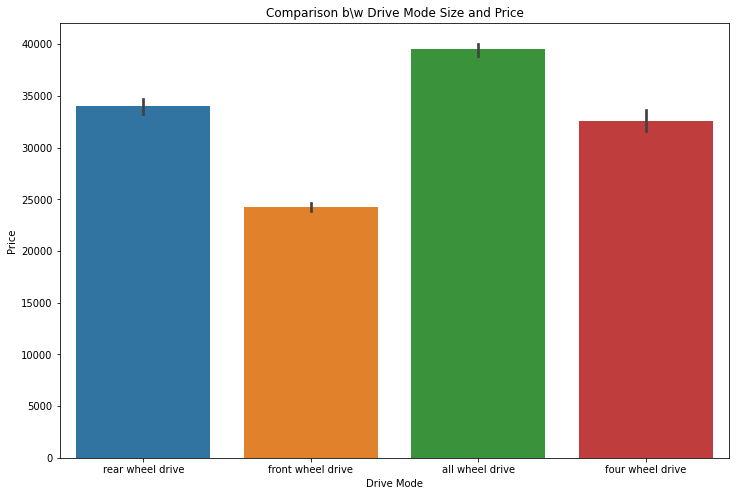

In [158]:
plt.figure(figsize=(12,8))
sns.barplot(dataset['Drive Mode'],dataset['Price'])
plt.title('Comparison b\w Drive Mode Size and Price')

# Step 9 & 10 ( Splitting and Training the Model)

After the exciting EDA part, let us move towards some final step of our project i.e. training the model.
We see that in our dataset that there are various categorical values which must be converted in numerical type so as to use those variables too in training the model.

From the dataset below we see that there are 6 categorical variables namely - Make, Model, Transmission, Drive Mode, Vehicle Size and Vehicle Style.

In [159]:
dataset.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


## Extracting the categorical variables in one variable

To ease our job of converting the categorical variable into numeric type, we first extract all the categorical variables and store it into a single variable with the help of select_dtype() function

In [160]:
catago = dataset.select_dtypes(exclude = [np.number]) #storing catagorical variables in catago
catago

,Make,Model,Transmission,Drive Mode,Vehicle Size,Vehicle Style
0,BMW,1 Series M,MANUAL,rear wheel drive,Compact,Coupe
1,BMW,1 Series,MANUAL,rear wheel drive,Compact,Convertible
2,BMW,1 Series,MANUAL,rear wheel drive,Compact,Coupe
3,BMW,1 Series,MANUAL,rear wheel drive,Compact,Coupe
4,BMW,1 Series,MANUAL,rear wheel drive,Compact,Convertible
...,...,...,...,...,...,...
11909,Acura,ZDX,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11910,Acura,ZDX,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11911,Acura,ZDX,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11912,Acura,ZDX,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback


## Label Encoder

Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering. 

LabelEncoder class is available in sklearn.preprocessing and can be imported easily and then the variable that we used to store the categorical varible is converted into numerical type using simple looping technique.

In [161]:
from sklearn.preprocessing import LabelEncoder #importing label encoder class
le = LabelEncoder()                            #creating the object of LabelEncoder class
for i in catago:
  dataset[i] = le.fit_transform(dataset[i])   #converting the categorical varible into numeric
dataset.head(10)                              #displaying the data to confirm our code worked properly

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,3,1,2011,335.0,6.0,2,3,0,8,26,19,3916,46135
1,3,0,2011,300.0,6.0,2,3,0,6,28,19,3916,40650
2,3,0,2011,300.0,6.0,2,3,0,8,28,20,3916,36350
3,3,0,2011,230.0,6.0,2,3,0,8,28,18,3916,29450
4,3,0,2011,230.0,6.0,2,3,0,6,28,18,3916,34500
5,3,0,2012,230.0,6.0,2,3,0,8,28,18,3916,31200
6,3,0,2012,300.0,6.0,2,3,0,6,26,17,3916,44100
7,3,0,2012,300.0,6.0,2,3,0,8,28,20,3916,39300
8,3,0,2012,230.0,6.0,2,3,0,6,28,18,3916,36900
9,3,0,2013,230.0,6.0,2,3,0,6,27,18,3916,37200


In [162]:
dataset.tail()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
11909,0,636,2012,300.0,6.0,1,0,2,2,23,16,204,46120
11910,0,636,2012,300.0,6.0,1,0,2,2,23,16,204,56670
11911,0,636,2012,300.0,6.0,1,0,2,2,23,16,204,50620
11912,0,636,2013,300.0,6.0,1,0,2,2,23,16,204,50920
11913,19,637,2006,221.0,6.0,1,2,2,14,26,17,61,28995


## Splitting the Independent and Dependent Variables in Seperate Variable

So the main problem that we all face is that which variable should we use to train our model perfectly, well the answer is totally dependent on our intuition. Firstly i took all the variables except "Model" and i got the r2 score nearly around 0.93 because i thought that "Model" make our model complex but i was wrong, after taking all the variable my model was more perfectly train.
So it all depend on our intuitions.

In [163]:
# x is independent variable and y is dependent
x = dataset[['Make','Model','Year','HP','Cylinders','Transmission', 'Drive Mode', 'Vehicle Size', 'Vehicle Style', 'MPG-H','MPG-C','Popularity']].values
y = dataset['Price'].values

## Splitting the dataset into training and  test set

Splitting the dataset is important because when we train our model we need certain set of data to test our model and calculate it's score and make changes to make it more perfect.

x_train - Training data of independent variables

y_train - training data of dependent variables

x_test - testing data of independent variables

y_test - testing data of dependent variables

Most recommended splitting percentage is 80-20 or 75-25, here i have done 80-20 splitting.

In [164]:
from sklearn.model_selection import train_test_split #importing the class
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) #splitting the data

## Standard Scaler

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler makes the mean of the distribution 0. About 68% of the values will lie be between -1 and 1.

Having the values between a perticular range helps the machine to learn and predict the model more perfectly.

Here a question arises when to perform scaling, before splitting or after it.
I have scaled it after spiltting the data to avoid "LEAK" of data. Here it doesn't matter to scale before or after the splitting but in later stages of Machine Learning it is a good practice to scale the data after the spliting to avoid the "leakage".

In [165]:
from sklearn.preprocessing import StandardScaler #importing the class
sc_x = StandardScaler()                         #scaler object for independent variables
sc_y = StandardScaler()                         #scaler object for dependent variable
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.fit_transform(y_train.reshape(-1,1))
y_test = sc_y.transform(y_test.reshape(-1,1))

# Building the Model

## Which model to use?

The answer is simple, we have to try and test every model and then pick the model which is dominant over other model, there isn't any escape.

In this project i have build 5 models namely - 

1) Linear Regression

2) Support Vector Machine

3) Decision Tree

4) Random Forest

5) XGBoost

## How to check the performance of the model?

There are three ways to check the performance of the model namely - 

## r2 score

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. 0% indicates that the model explains none of the variability of the response data around its mean.

## Mean Square Error (MSE)

In statistics, the mean squared error or mean squared deviation of an estimator measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss.

## Mean Absolute Error (MAE)

In statistics, mean absolute error is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement.

## Where to use which Metric to determine the Performance of a Machine Learning Model?¶

MAE: It is not very sensitive to outliers in comparison to MSE since it doesn't punish huge errors. It is usually used when the performance is measured on continuous variable data. It gives a linear value, which averages the weighted individual differences equally. The lower the value, better is the model's performance.

MSE: It is one of the most commonly used metrics, but least useful when a single bad prediction would ruin the entire model's predicting abilities, i.e when the dataset contains a lot of noise. It is most useful when the dataset contains outliers, or unexpected values (too high or too low values).

RMSE: In RMSE, the errors are squared before they are averaged. This basically implies that RMSE assigns a higher weight to larger errors. This indicates that RMSE is much more useful when large errors are present and they drastically affect the model's performance. It avoids taking the absolute value of the error and this trait is useful in many mathematical calculations. In this metric also, lower the value, better is the performance of the model.

## Linear Regression

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

In [166]:
from sklearn.linear_model import LinearRegression #importing linear regression class
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting  

In [167]:
y_pred = regressor.predict(x_test) #predicting the values

## Plotting the Test and Predicted result using scatter plot

We can observe that the model worked perfectly for middle part of the data but no for the extreme part.

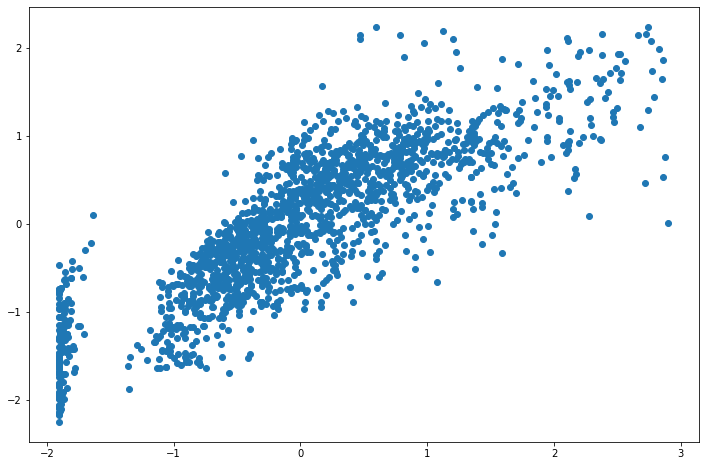

In [168]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred) #plotting the test and predicted result

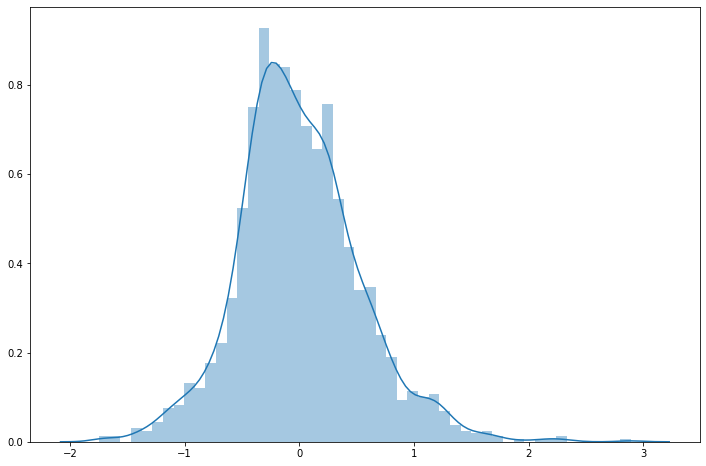

In [169]:
plt.figure(figsize=(12,8))
sns.distplot((y_test-y_pred),bins=50)

## Conclusion of Previous Model

We got a fair result from the linear regression model but not reach our expectation.

We calculated the r2 score, MAE and MSE for this model and the results are displayed below.

In [170]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  #calculating MAE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #calculating MSE
print('R2 Score:', metrics.r2_score(y_test, y_pred)) #calculating r2_score
LinRegscore = metrics.r2_score(y_test, y_pred)

Mean Absolute Error: 0.4091040214162511
Root Mean Squared Error: 0.5332827711109319
R2 Score: 0.7055995762796488


## Support Vector Machine

In machine learning, support-vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.

In [171]:
from sklearn.svm import SVR #importing SVR Class
regressor= SVR(kernel = 'rbf') #using radial base kernel and creating the object of SVR
regressor.fit(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting 

In [172]:
y_pred = regressor.predict(x_test)

## Plotting

We got a fairly linear graph of SVR

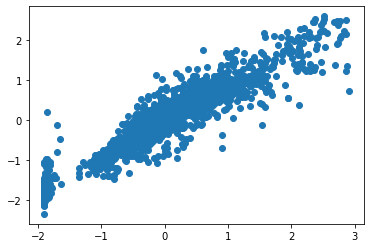

In [173]:
plt.scatter(y_test,y_pred)

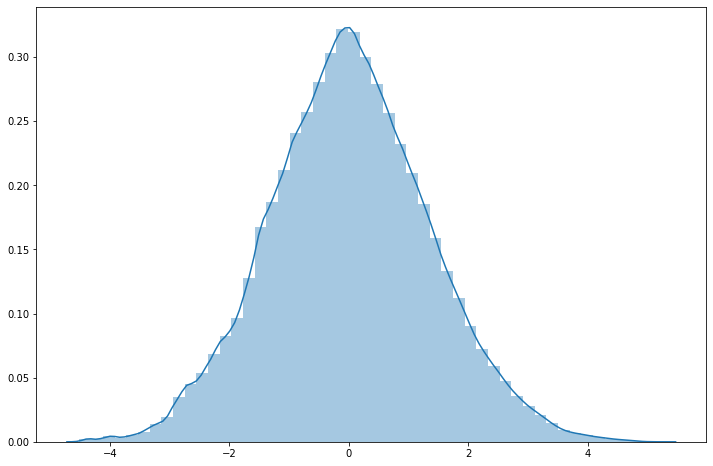

In [174]:
plt.figure(figsize=(12,8))
sns.distplot((y_test-y_pred),bins=50)

## Drawing conclusion for SVR

Results were pretty good when compared to linear regression.

In [175]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))
SVBFscore = metrics.r2_score(y_test, y_pred)

Mean Absolute Error: 0.24079269806324016
Root Mean Squared Error: 0.34451974528011836
R2 Score: 0.8771283870022241


## Decision Tree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.

In [176]:
from sklearn.tree import DecisionTreeRegressor #importing the decision tree class
regressor = DecisionTreeRegressor(random_state = 0) #creating it's object
regressor.fit(x_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

## Predicting

In [177]:
y_pred = regressor.predict(x_test)

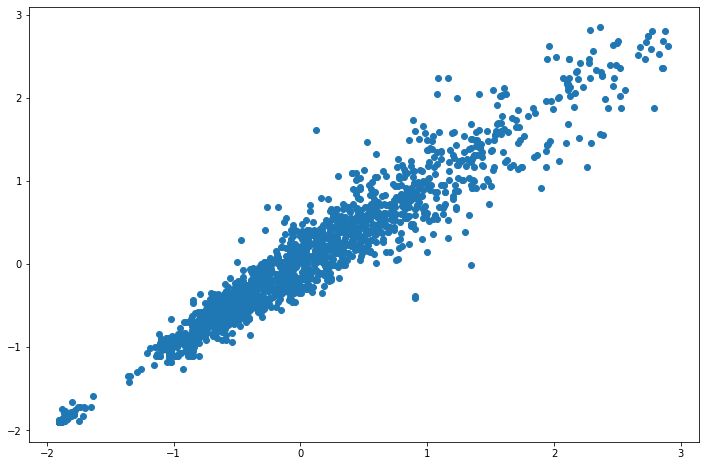

In [178]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred) #plotting the test and predicted results

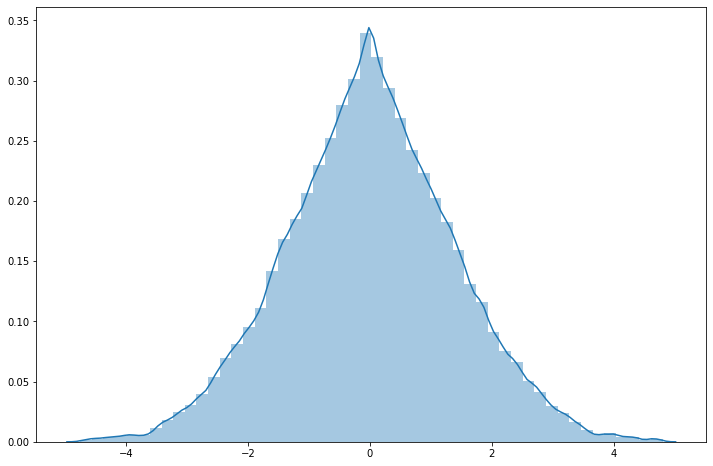

In [179]:
plt.figure(figsize=(12,8))
sns.distplot((y_test-y_pred),bins=50)

## Drawing conclusion

Decision tree beats the SVR model by 0.06 r2_score

In [180]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))
DecTreescore = metrics.r2_score(y_test, y_pred)

Mean Absolute Error: 0.17307302411617237
Root Mean Squared Error: 0.24849887567694084
R2 Score: 0.9360747874284399


## Random Forest Regression

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [181]:
from sklearn.ensemble import RandomForestRegressor #importing the random forest regressor
regressor = RandomForestRegressor(n_estimators=200, random_state = 0) #creating it's object with 200 branches
regressor.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## Predicting 

In [182]:
y_pred = regressor.predict(x_test)

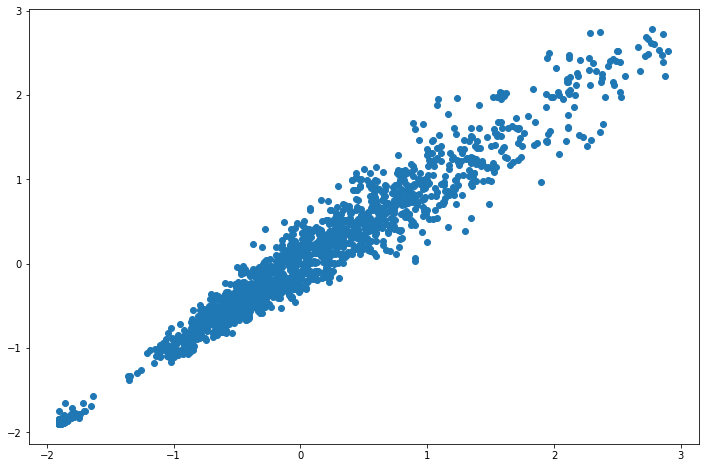

In [183]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred)

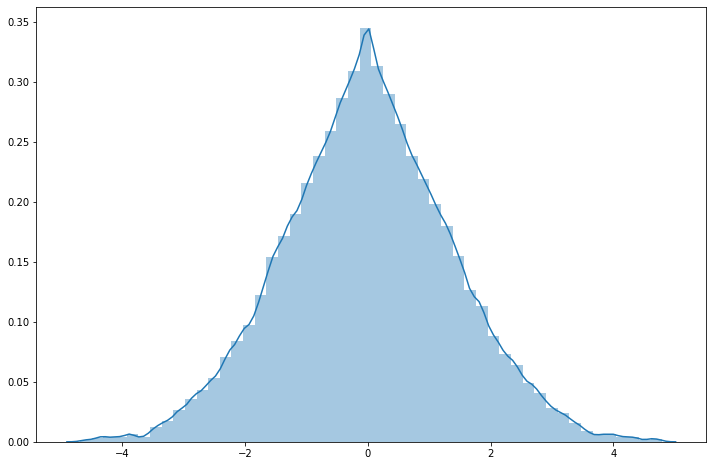

In [184]:
plt.figure(figsize=(12,8))
sns.distplot((y_test-y_pred),bins=50)

## Drawing conclusion

Random forest regressor gave us the best r2_score yet.

In [185]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))
RandForscore = metrics.r2_score(y_test, y_pred)

Mean Absolute Error: 0.15852071118007008
Root Mean Squared Error: 0.21876741350038542
R2 Score: 0.9504562826985665


## XGBoost Regressor

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.

In [186]:
from xgboost import XGBRegressor #importing the XGBoost regression
regressor = XGBRegressor()
regressor.fit(x_train, y_train)

[18:11:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

## Predicting 

In [187]:
y_pred = regressor.predict(x_test)

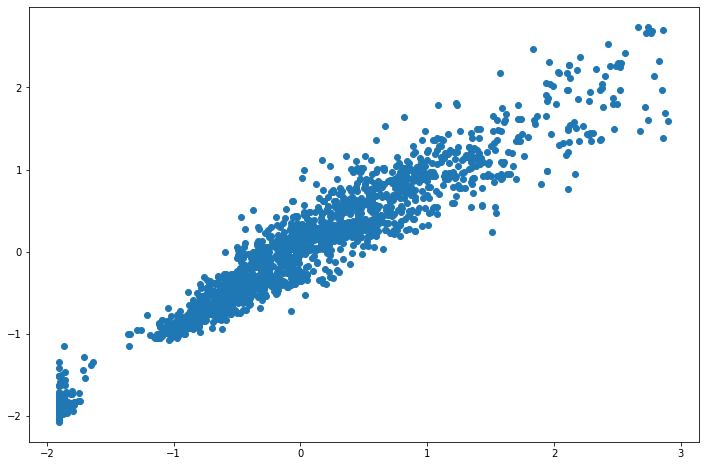

In [188]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred) #plotting test and predicted value

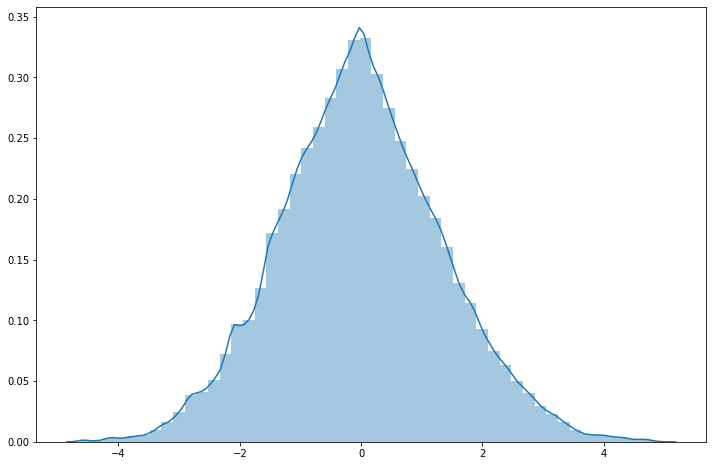

In [189]:
plt.figure(figsize=(12,8))
sns.distplot((y_test-y_pred),bins=50)

## Drwaing Conclusion

Couldn't beat random forest regressor but got a pretty good result too.

In [190]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))
XGBscore = metrics.r2_score(y_test, y_pred)

Mean Absolute Error: 0.20930260901987555
Root Mean Squared Error: 0.2890805102192772
R2 Score: 0.9134910681401334


## Comapring

Comparing results from every model we trained by using DataFrame() function of pandas library

In [191]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Support Vector Regression', 'Decision Tree', 
              'Random Forest', 'XGBoost'],
    'Score': [LinRegscore, SVBFscore, DecTreescore, RandForscore, XGBscore]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.950456
2,Decision Tree,0.936075
4,XGBoost,0.913491
1,Support Vector Regression,0.877128
0,Linear Regression,0.705600


# Final Conclusion

We have tried various model but the best score we got is from Random Forest Regressor which is 0.946 which is a fairly good score when we're provided with such a huge data which require lot of cleaning and statistical analysis. One way of increasing this score is by introducing other variable in the dataset by mixing two or more variable so that our dataset becomes compact and much can be learned by our machine.



#                                           THANK YOU!!!